In [33]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib

In [3]:
military_service = pd.read_csv("./data/military_production.csv")
military_service.head()

,code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,533,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,24,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,8,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,20,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
military_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   code            215 non-null    int64  
 1   Type            215 non-null    object 
 2   Indicator Name  215 non-null    object 
 3   1960            65 non-null     float64
 4   1961            70 non-null     float64
 5   1962            75 non-null     float64
 6   1963            77 non-null     float64
 7   1964            77 non-null     float64
 8   1965            81 non-null     float64
 9   1966            81 non-null     float64
 10  1967            82 non-null     float64
 11  1968            89 non-null     float64
 12  1969            89 non-null     float64
 13  1970            95 non-null     float64
 14  1971            97 non-null     float64
 15  1972            98 non-null     float64
 16  1973            102 non-null    float64
 17  1974            100 non-null    flo

In [9]:
response = requests.get("https://en.wikipedia.org/wiki/ISO_3166-1")
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.find_all("table",{"class": "wikitable"})[1]
    tds = table.find_all("td")
    countries = tds[::6]
    symbols = tds[2::6]
    codes = tds[3::6]

In [13]:
clean_countries = []
clean_codes = []
clean_symbols = []
for country, symbol, code in zip(countries, symbols, codes):
    clean_countries.append(country.text[:len(country.text)-1])
    clean_symbols.append(symbol.text)
    clean_codes.append(code.text)
    

In [17]:
wiki = pd.DataFrame({"country": clean_countries, "symbol": clean_symbols, "code": clean_codes})
wiki

,country,symbol,code
0,Afghanistan[b],AFG,004
1,Åland Islands,ALA,248
2,Albania,ALB,008
3,Algeria,DZA,012
4,American Samoa,ASM,016
...,...,...,...
244,Wallis and Futuna,WLF,876
245,Western Sahara[b],ESH,732
246,Yemen,YEM,887
247,Zambia,ZMB,894


In [18]:
wiki.to_csv("./data/countries_codes.csv", index = False)

In [20]:
wiki["code"] = wiki["code"].apply(int)

In [21]:
wiki

,country,symbol,code
0,Afghanistan[b],AFG,4
1,Åland Islands,ALA,248
2,Albania,ALB,8
3,Algeria,DZA,12
4,American Samoa,ASM,16
...,...,...,...
244,Wallis and Futuna,WLF,876
245,Western Sahara[b],ESH,732
246,Yemen,YEM,887
247,Zambia,ZMB,894


In [22]:
military_service

,code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,533,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,24,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,8,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,20,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,882,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,887,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.420775e+09,1.448153e+09,1.612254e+09,1.618840e+09,1.648751e+09,1.714831e+09,NaN,NaN,NaN,NaN
212,710,Country,Military expenditure (current USD),69999972.0,113749954.5,186199925.5,188999924.4,271599891.4,289449884.2,324449870.2,...,3.592688e+09,4.188168e+09,4.594154e+09,4.489590e+09,4.118208e+09,3.892469e+09,3.488868e+09,3.169756e+09,3.638937e+09,3.639879e+09
213,894,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.209623e+08,2.801878e+08,3.091138e+08,3.463014e+08,3.813458e+08,4.436044e+08,3.724476e+08,2.995048e+08,3.396645e+08,3.780254e+08


In [23]:
merged_data = military_service.merge(wiki, left_on="code", right_on="code", how="inner")

In [24]:
merged_data

,code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,country,symbol
0,533,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW
1,4,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08,Afghanistan[b],AFG
2,24,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09,Angola,AGO
3,8,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08,Albania,ALB
4,20,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andorra,AND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,882,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samoa,WSM
211,887,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.612254e+09,1.618840e+09,1.648751e+09,1.714831e+09,NaN,NaN,NaN,NaN,Yemen,YEM
212,710,Country,Military expenditure (current USD),69999972.0,113749954.5,186199925.5,188999924.4,271599891.4,289449884.2,324449870.2,...,4.594154e+09,4.489590e+09,4.118208e+09,3.892469e+09,3.488868e+09,3.169756e+09,3.638937e+09,3.639879e+09,South Africa,ZAF
213,894,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.091138e+08,3.463014e+08,3.813458e+08,4.436044e+08,3.724476e+08,2.995048e+08,3.396645e+08,3.780254e+08,Zambia,ZMB


In [27]:
merged_data["total"] = (merged_data.loc[:, "1960":"2018"]).sum(axis=1, skipna=True)

In [28]:
merged_data.head()

,code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,country,symbol,total
0,533,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,ABW,0.000000e+00
1,4,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08,Afghanistan[b],AFG,3.239602e+09
2,24,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09,Angola,AGO,7.011220e+10
3,8,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08,Albania,ALB,3.054373e+09
4,20,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andorra,AND,0.000000e+00


In [30]:
graph = merged_data.sort_values(by = "total", ascending = False).head(n=10)
graph

,code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,country,symbol,total
202,840,Country,Military expenditure (current USD),4.538000e+10,4.780800e+10,5.238100e+10,5.229500e+10,5.121300e+10,5.182700e+10,6.357200e+10,...,6.850000e+11,6.400000e+11,6.100000e+11,5.960000e+11,6.000000e+11,6.060000e+11,6.490000e+11,United States of America,USA,1.728412e+13
35,156,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.570000e+11,1.800000e+11,2.010000e+11,2.140000e+11,2.160000e+11,2.280000e+11,2.500000e+11,China[b],CHN,2.368372e+12
63,250,Country,Military expenditure (current USD),3.881220e+09,4.131004e+09,4.493324e+09,4.628061e+09,4.917957e+09,5.124507e+09,5.414602e+09,...,6.003515e+10,6.241710e+10,6.361357e+10,5.534213e+10,5.735841e+10,6.041750e+10,6.379968e+10,France,FRA,1.927283e+12
67,826,Country,Military expenditure (current USD),4.587798e+09,4.747398e+09,5.005698e+09,5.196798e+09,5.508998e+09,5.791098e+09,5.984998e+09,...,5.849566e+10,5.686176e+10,5.918286e+10,5.386219e+10,4.811894e+10,4.643330e+10,4.999719e+10,United Kingdom of Great Britain and Northern ...,GBR,1.801942e+12
49,276,Country,Military expenditure (current USD),2.884518e+09,3.266496e+09,4.308248e+09,4.981004e+09,4.888249e+09,4.978559e+09,5.063638e+09,...,4.647087e+10,4.593054e+10,4.610267e+10,3.981258e+10,4.157949e+10,4.538172e+10,4.947063e+10,Germany,DEU,1.611065e+12
97,392,Country,Military expenditure (current USD),4.805556e+08,4.923611e+08,5.381944e+08,6.298611e+08,7.180556e+08,8.213889e+08,9.324306e+08,...,6.001153e+10,4.902393e+10,4.688124e+10,4.210610e+10,4.647129e+10,4.538703e+10,4.661795e+10,Japan,JPN,1.511238e+12
166,682,Country,Military expenditure (current USD),1.408889e+08,7.155556e+07,8.422222e+07,1.137778e+08,1.235556e+08,1.777778e+08,3.004444e+08,...,5.649787e+10,6.702000e+10,8.076240e+10,8.718587e+10,6.367280e+10,7.040000e+10,6.755467e+10,Saudi Arabia,SAU,1.241866e+12
164,643,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.146940e+10,8.835290e+10,8.469650e+10,6.641871e+10,6.924531e+10,6.652730e+10,6.138755e+10,Russian Federation,RUS,1.014830e+12
88,356,Country,Military expenditure (current USD),6.817657e+08,7.483882e+08,1.065436e+09,1.795449e+09,1.986654e+09,2.125990e+09,1.661155e+09,...,4.721692e+10,4.740353e+10,5.091411e+10,5.129548e+10,5.663762e+10,6.455944e+10,6.651029e+10,India,IND,9.356049e+11
94,380,Country,Military expenditure (current USD),1.009309e+09,1.062907e+09,1.222014e+09,1.463284e+09,1.586667e+09,1.719942e+09,1.904605e+09,...,2.978101e+10,2.995745e+10,2.770103e+10,2.218085e+10,2.503303e+10,2.644789e+10,2.780751e+10,Italy,ITA,9.035149e+11


<AxesSubplot:ylabel='country'>

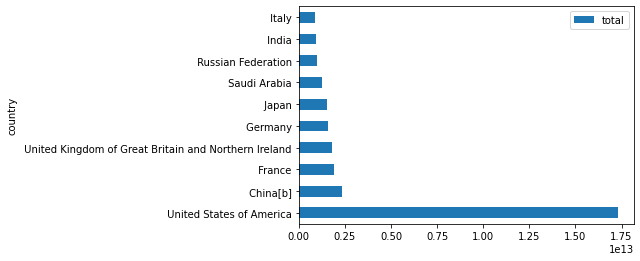

In [34]:
graph.plot.barh(x = "country", y = "total")

In [36]:
merged_data.to_excel("./data/output.xlsx", sheet_name ="merged_data")